In [4]:
import matplotlib.pyplot as plt
import load_images as li
import numpy as np
from scipy import ndimage

dict_keys(['Sunflowers', 'Monroe', 'Airplane', 'Coins', 'Testshapes', 'Jetski', 'Pinkflower'])

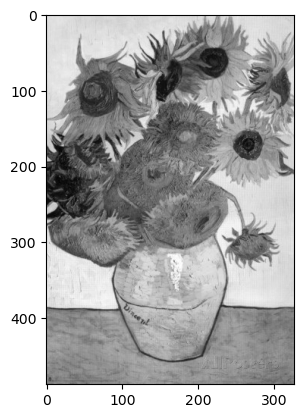

In [5]:
images = li.getImages()
plt.imshow(images['Sunflowers'], cmap='gray')
images.keys()

# Task 1

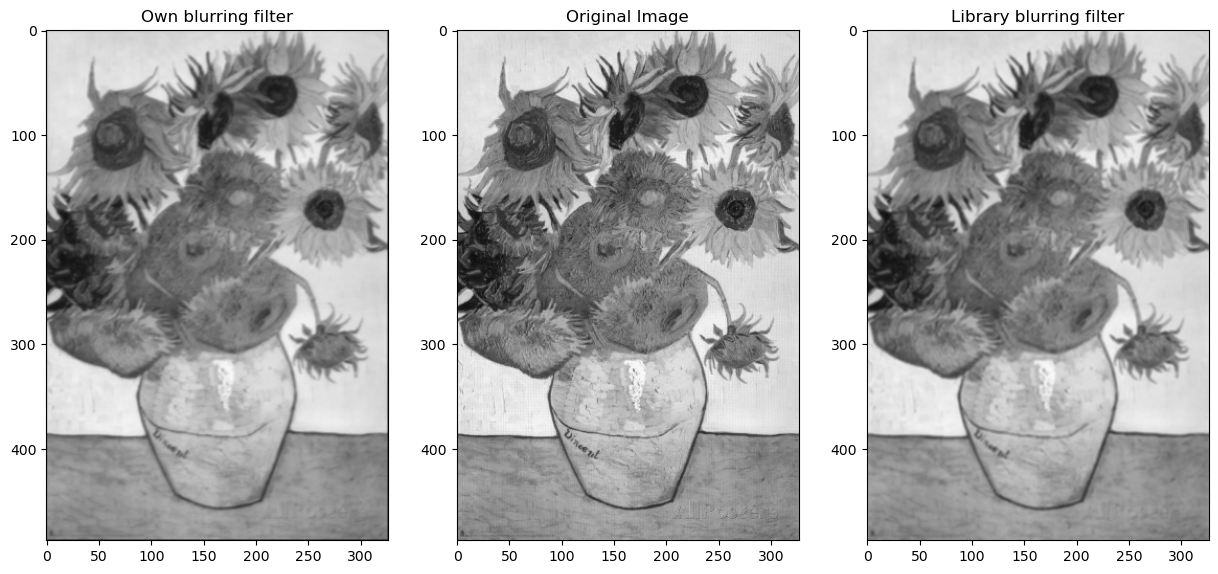

In [18]:
def get_intensity(img,i,j):
    if i < 0 or i >= len(img):
        return 0.0
    elif j < 0 or j >= len(img[0]):
        return 0.0
    else:
        return img[i,j]

def apply_filter(img, i, j, F):
    res = np.ones(F.shape)
    for x in range(i-(F.shape[0]-1)//2, i+(F.shape[1]+1)//2):
        for y in range(j-1, j+2):
            res[(x+1)-i,(y+1)-j] = get_intensity(img, x, y)
    res = (res * F).sum()
    # print(res)
    return res


def my_filter(img, F):
    img = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i,j] = apply_filter(img, i, j, F)
    return img

F = (1/9) * np.ones((3,3))
img_filtered = my_filter(images['Sunflowers'], F)
fig, ax = plt.subplots(1, 3, figsize=(15,7))
ax[0].title.set_text('Own blurring filter')
ax[0].imshow(img_filtered, cmap='gray', vmin=0, vmax=1)
ax[1].title.set_text('Original Image')
ax[1].imshow(images['Sunflowers'], cmap='gray', vmin=0, vmax=1)
image_lib = ndimage.convolve(images['Sunflowers'], F)
ax[2].title.set_text('Library blurring filter')
ax[2].imshow(image_lib, cmap='gray', vmin=0, vmax=1)



# Task 2a - 2c
a = Sharpening: Original image + (Original image - Median filter)
b = Denoising with median filter
c = Edge detection

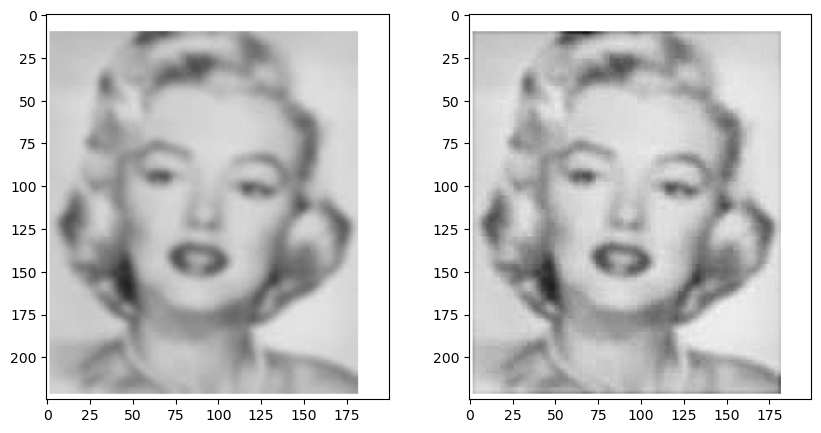

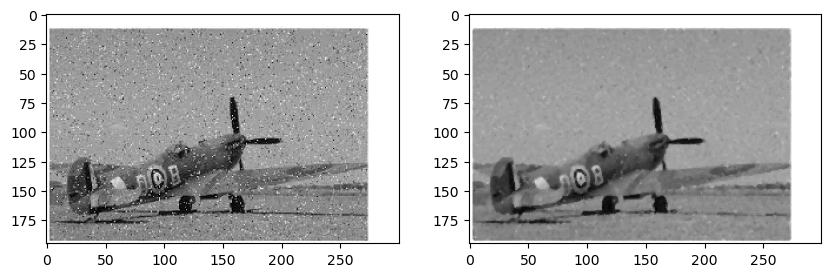

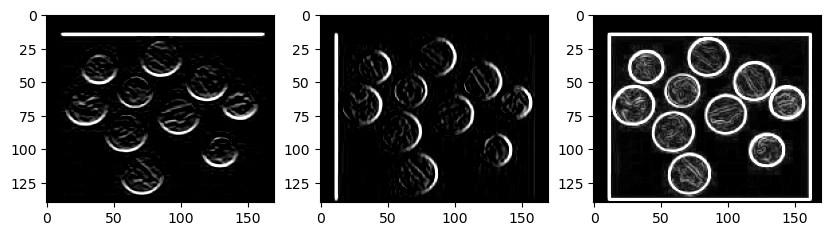

In [27]:
sharpen = (-1/25) * np.ones((5,5))
sharpen[2,2] = 2 + sharpen[1,1]
monroe = images['Monroe']
f_monroe = ndimage.convolve(monroe, sharpen)
f_monroe = monroe/25 + f_monroe
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(monroe[25:250, 100:300], cmap='gray', vmin=0, vmax=1)
ax[1].imshow(f_monroe[25:250, 100:300], cmap='gray', vmin=0, vmax=1)
plt.show()

flugzeug = images['Airplane']
f_flugzeug = ndimage.median_filter(flugzeug, 3)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(flugzeug[25:220, 100:400], cmap='gray', vmin=0, vmax=1)
ax[1].imshow(f_flugzeug[25:220, 100:400], cmap='gray', vmin=0, vmax=1)
plt.show()


coins = images['Coins']
# Construct filters for edge detection
grad_x = np.ones((3,3))
grad_y = np.ones((3,3))
grad_x[0,:] = np.array([-1,-1,-1])
grad_x[1,:] = np.zeros((1,3))
grad_x[2,:] = np.ones((1,3))

grad_y[:,0] = -1 * np.ones((1,3))
grad_y[:,1] = 0 * np.ones((1,3))
grad_y[:,2] = np.ones((1,3))



fx_coins = ndimage.convolve(coins, grad_x)
fy_coins = ndimage.convolve(coins, grad_y)
f_coins = (fx_coins**2 + fy_coins**2)**(1/2)

fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].imshow(fx_coins[20:160, 90:260], cmap='gray', vmin=0, vmax=1)
ax[1].imshow(fy_coins[20:160, 90:260], cmap='gray', vmin=0, vmax=1)
ax[2].imshow(f_coins[20:160, 90:260], cmap='gray', vmin=0, vmax=1)

plt.show()


# Task 3
a) Motion blur, horizontally
b) Motion blur, diagonally

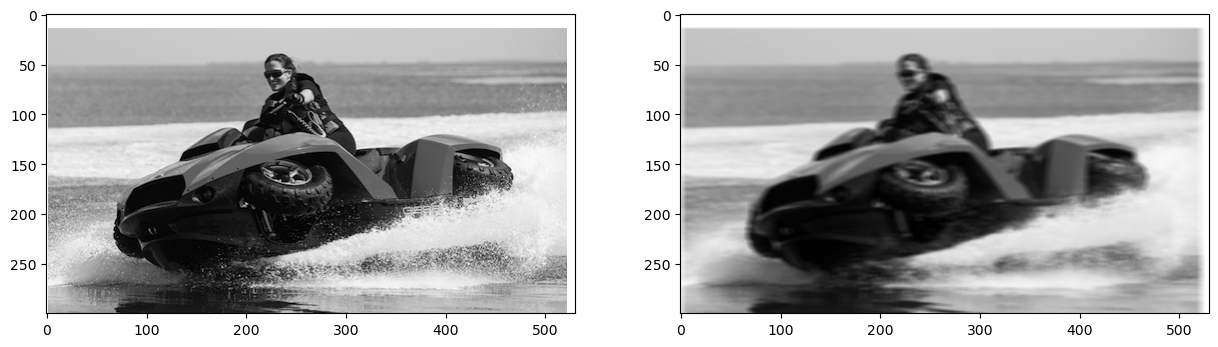

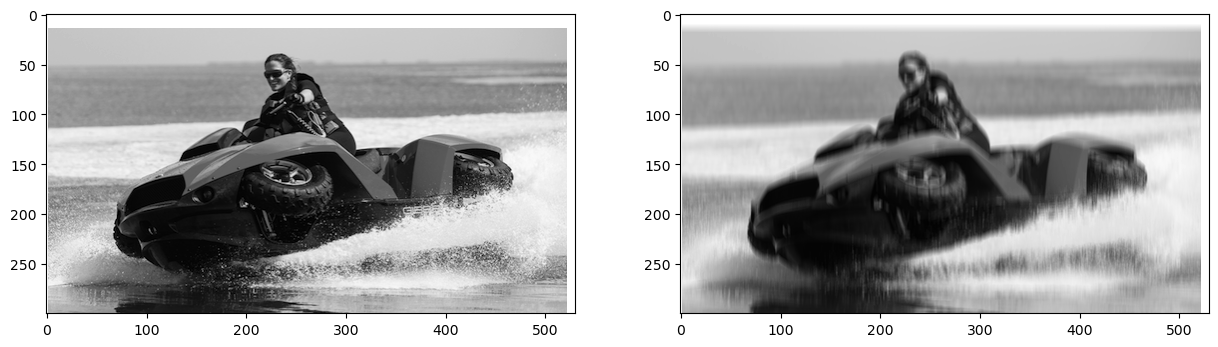

In [8]:
jetski = li.rgb2gray(images['Jetski'])
hor_blur = np.zeros((9,9))
hor_blur[4,:] = (1/9) * np.ones((1,9))
hor_blur[3,:] = (1/9) * np.ones((1,9))
hor_blur[5,:] = (1/9) * np.ones((1,9))


ver_blur = np.zeros((9,9))
ver_blur[:,4] = (1/9) * np.ones((1,9))

f_jetski = ndimage.convolve(jetski, hor_blur)
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(jetski[20:320, 100:630], cmap='gray')
ax[1].imshow(f_jetski[20:320, 100:630], cmap='gray')

f_jetski = ndimage.convolve(jetski, ver_blur)
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(jetski[20:320, 100:630], cmap='gray')
ax[1].imshow(f_jetski[20:320, 100:630], cmap='gray')

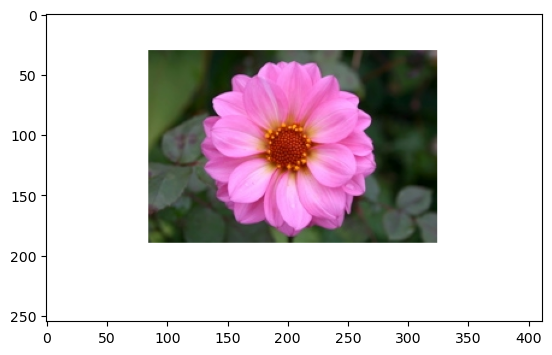

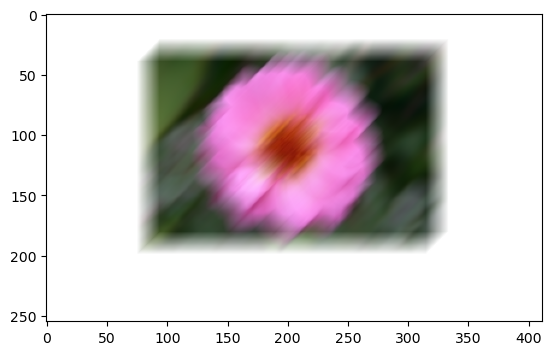

In [29]:
flower = images['Pinkflower']

r,g,b = flower[:,:,0],flower[:,:,1], flower[:,:,2]

n = 19
diagonal = (1/n) * np.flipud(np.eye(n))

r_f = ndimage.convolve(r, diagonal)
g_f = ndimage.convolve(g, diagonal)
b_f = ndimage.convolve(b, diagonal)
flower_f = np.dstack((r_f, g_f, b_f))
plt.imshow(flower)
plt.show()
plt.imshow(flower_f)

# Task 4

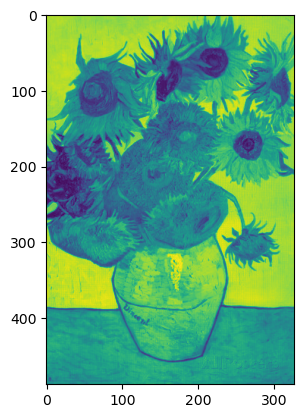

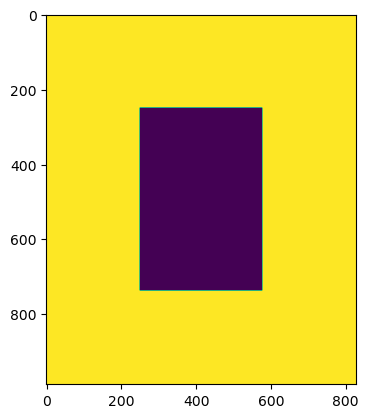

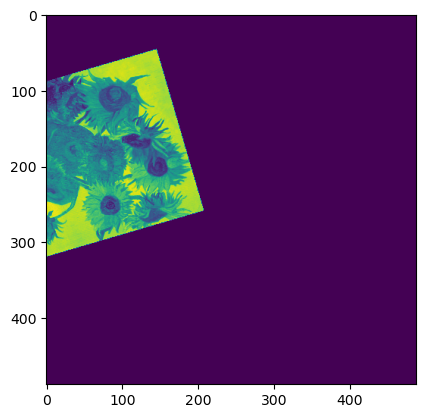

In [32]:
import cv2
import scipy

def rotate_around_point(p, a, b, phi):
    p = np.append(p, 1)
    translation = np.identity(3)
    translation[0:2,2] = np.array([a,b])
    back_translation = np.identity(3)
    back_translation[0:2, 2] = np.array([-a,-b])
    rotation = np.identity(3)
    rotation[0:2, 0:2] = np.array([[np.cos(phi), -np.sin(phi)], [np.sin(phi), np.cos(phi)]])
    return translation.dot(rotation).dot(back_translation).dot(p)[0:2]

def rotate(img, i_out, j_out, phi):
    middle = np.array(img.shape) // 2
    i_out = i_out
    j_out = j_out

    a = middle[0] - i_out
    b = middle[1] - j_out

    res = rotate_around_point(np.array([i_out, j_out]), a,b,phi)
    # print(res.astype(int))
    # print(res)

    if res[0] > img.shape[0] or res[1] > img.shape[1] or res[0] < 0 or res[1] < 0:
        return []
    return res

def padding(img, height_increase, width_increase):
    # Create new image of desired size for padding
    height_old, width_old = img.shape
    height_new = height_old + height_increase
    width_new = width_old + width_increase
    result = np.full([height_new, width_new], 128, dtype=np.uint8)

    # Compute center offset
    x_center = (height_new - height_old) // 2
    y_center = (width_new - width_old) // 2

    # Rotate image with interpolation
    interpolation = scipy.interpolate.RectBivariateSpline(np.arange(0, img.shape[0]), np.arange(0, img.shape[1]), img)
    big_one = np.zeros((max(img.shape), max(img.shape)))

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            res = rotate(img, i, j, np.pi / 4)
            if len(res) != 0:
                res = interpolation.ev([res[0]], [res[1]])
                big_one[i,j] = res

    # Copy rotated image into center of new image
    result[y_center:y_center+height_old, x_center:x_center+width_old] = img # Here it fails
    return result, big_one

img = images['Sunflowers']
plt.imshow(img)
plt.show()

# Choose padding so that the new image fits into the template (padded original image size)
result, big_one = padding(img, 500, 500)
plt.imshow(result)
plt.show()
plt.imshow(big_one)
plt.show()

In [33]:
# Not fully functional, for details see in 316 below
from numpy.linalg import inv

def backwardScaling(img, alpha):
    height, width = img.shape
    newX = int(np.ceil(width * alpha))
    newY = int(np.ceil(height * alpha))
    T = inv([[alpha, 0, 0],
             [0, alpha, 0],
             [0, 0, 1]])

    result = np.ones((newX, newY, 1))

    for x in range(newX):
        for y in range(newY):
            p = np.array([x, y, 1])
            q = T @ p
            u = np.round(q[0]).astype(int)
            v = np.round(q[1]).astype(int)
            if 0 < u <= height and 0 < v <= width:
                result[x,y] = img[u,v]

    return result


def rotateAroundCentre(img, phi):
    height, width = img.shape
    # Rotation
    R = np.array([
                    [np.cos(phi), -np.sin(phi), 0],
                    [np.sin(phi),  np.cos(phi), 0],
                    [0, 0, 1]
                 ])
    # Center of rotation: Center of the image
    image_center = [np.ceil(height//2), np.ceil(width//2)]

    # Translation
    T1 = np.array([
                    [1, 0, image_center[0]],
                    [0, 1, image_center[1]],
                    [0, 0, 1]
                  ])
    T2 = np.array([
                    [1, 0, -image_center[0]],
                    [0, 1, -image_center[1]],
                    [0, 0 ,1]
                 ])

    result = np.ones((height, width, 3))

    for x in range(height):
        for y in range(width):
            p = np.array([x, y, 1])
            q = T1@R@T2@p
            u = np.round(q[0]).astype(int)
            v = np.round(q[1]).astype(int)
            if 0 < u <= height and 0 < v <= width:
                result[x,y] = img[u,v-1]

    return result

# Not functional
def moveImage(img, c1, c2):
    height, width = img.shape

    result = np.ones((2 * c1, 2 * c2, 3))

    for x in range(height):
        for y in range(width):
            p = np.array([x, y, 1])
            q = p + [c1, c2-1, 1]
            result[q[0],q[1]] = img[x,y]
    return result


def rotateAroundCorner(img, phi):
    height = img.shape[0]
    width = img.shape[1]
    # Rotation
    R = np.array([[np.cos(phi), -np.sin(phi), 0], [np.sin(phi), np.cos(phi), 0], [0, 0, 1]])

    # Center of rotation: Upper left corner of the image
    # Calculate deltaX and deltaY: Calculate the diagonal of the picture with Pythagoras, deltaX = deltaY = c

    # ERROR c becomes too large
    # c = int(np.ceil(np.square( (height**2 + width**2)) ))
    # Arbitrary value for c
    c = 400


    # Translation
    T1 = [[1, 0, c],
          [0, 1, c],
          [0, 0, 1]]
    T2 = [[1, 0, -c],
          [0, 1 -c],
          [0, 0, 1]]

    movedImage = moveImage(img, c, c)
    print(movedImage)
    height_mimage, width_mimage = movedImage.shape
    result = np.ones((height_mimage, width_mimage, 3))

    for x in range(height_mimage):
        for y in range(width_mimage):
            p = [x, y, 1]
            q = T1@R@T2@p
            u = np.round(q[0]).astype(int)
            v = np.round(q[1]).astype(int)
            if 0 < u <= height_mimage and 0 < v <= height_mimage:
                 result[x,y] = movedImage[u,v]
    return result

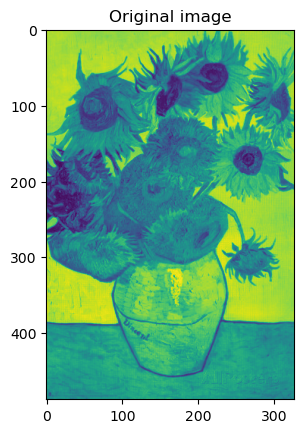

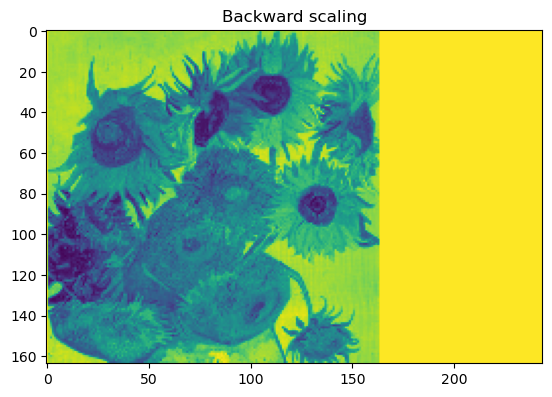

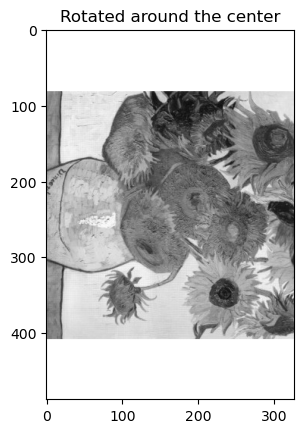

IndexError: index 800 is out of bounds for axis 0 with size 800

In [34]:
# Not fully functional, see note below
# Load image
img = images['Sunflowers']
plt.title('Original image')
plt.imshow(img)
plt.show()

# Backward scaling
# Parts of the picture are cropped
alpha = 0.5 # Alpha must be smaller than 1
result = backwardScaling(img, alpha)
plt.title('Backward scaling')
plt.imshow(result)
plt.show()

# Picture: Rotate around the center
# Works only for 90 degrees, additionally, picture is cropped
phi = np.pi/2
result = rotateAroundCentre(img, phi)
plt.title('Rotated around the center')
plt.imshow(result)
plt.show()

# Picture: Rotate around the top left corner
phi = np.pi/2
result = rotateAroundCorner(img, phi)
plt.title('Rotated around the top left corner')
plt.imshow(result)
plt.show()



In [48]:
# Functional
# Source
# https://gautamnagrawal.medium.com/rotating-image-by-any-angle-shear-transformation-using-only-numpy-d28d16eb5076

import numpy as np
from PIL import Image
import math


def shear(angle,x,y):
    '''
    |1  -tan(𝜃/2) |  |1        0|  |1  -tan(𝜃/2) |
    |0      1     |  |sin(𝜃)   1|  |0      1     |
    '''
    # shear 1
    tangent=math.tan(angle/2)
    new_x=round(x-y*tangent)
    new_y=y

    #shear 2
    new_y=round(new_x*math.sin(angle)+new_y)      #since there is no change in new_x according to the shear matrix

    #shear 3
    new_x=round(new_x-new_y*tangent)              #since there is no change in new_y according to the shear matrix

    return new_y,new_x




image = np.array(Image.open('Pics/sunflowers.png'))             # Load the image
angle_input=-int(input("Enter the angle :- "))                # Ask the user to enter the angle of rotation

# Define the most occurring variables
angle=math.radians(angle_input)                               #converting degrees to radians
cosine=math.cos(angle)
sine=math.sin(angle)

height=image.shape[0]                                   #define the height of the image
width=image.shape[1]                                    #define the width of the image

# Define the height and width of the new image that is to be formed
new_height  = round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine))+1
new_width  = round(abs(image.shape[1]*cosine)+abs(image.shape[0]*sine))+1

# define another image variable of dimensions of new_height and new _column filled with zeros
output=np.zeros((new_height,new_width,image.shape[2]))
image_copy=output.copy()


# Find the centre of the image about which we have to rotate the image
original_centre_height   = round(((image.shape[0]+1)/2)-1)    #with respect to the original image
original_centre_width    = round(((image.shape[1]+1)/2)-1)    #with respect to the original image

# Find the centre of the new image that will be obtained
new_centre_height= round(((new_height+1)/2)-1)        #with respect to the new image
new_centre_width= round(((new_width+1)/2)-1)          #with respect to the new image


for i in range(height):
    for j in range(width):
        #co-ordinates of pixel with respect to the centre of original image
        y=image.shape[0]-1-i-original_centre_height
        x=image.shape[1]-1-j-original_centre_width

        #Applying shear Transformation
        new_y,new_x=shear(angle,x,y)

        '''since image will be rotated the centre will change too,
            so to adust to that we will need to change new_x and new_y with respect to the new centre'''
        new_y=new_centre_height-new_y
        new_x=new_centre_width-new_x

        output[new_y,new_x,:]=image[i,j,:]                          #writing the pixels to the new destination in the output image

# converting array to image
pil_img=Image.fromarray((output).astype(np.uint8))
# saving the image
angle_string = str(angle_input)
pil_img.save("Results/rotated_image" + angle_string + ".png")